In [9]:
import pandas as pd

def process_wave_data(input_path, output_path, start_date, end_date):
    """
    处理波浪数据，提取指定日期范围的数据并修改列名。

    参数:
    input_path (str): 输入CSV文件的路径。
    output_path (str): 输出CSV文件的路径。
    start_date (str): 开始日期（格式为 'YYYY-MM-DD HH:MM'）。
    end_date (str): 结束日期（格式为 'YYYY-MM-DD HH:MM'）。
    """
    # 读取数据
    df = pd.read_csv(input_path)

    # 打印列名以检查
    print("Columns in the dataset:", df.columns)

    # 处理日期时间，首先尝试标准格式
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M', errors='coerce')

    # 检查哪些行未被解析并尝试另一种格式
    invalid_dates = df['Date/Time'].isna()
    if invalid_dates.any():
        print(f"Found {invalid_dates.sum()} invalid date formats, attempting to parse again...")
        df.loc[invalid_dates, 'Date/Time'] = pd.to_datetime(df.loc[invalid_dates, 'Date/Time'], format='%d/%m/%Y %H:%M', errors='coerce')

    # 再次检查是否有无效日期
    if df['Date/Time'].isna().any():
        print(f"Still found {df['Date/Time'].isna().sum()} invalid date formats after trying multiple formats.")

    # 提取指定日期范围的数据
    mask = (df['Date/Time'] >= start_date) & (df['Date/Time'] <= end_date)
    filtered_df = df.loc[mask].copy()  # 创建副本以避免 SettingWithCopyWarning

    # 修改列名
    filtered_df.rename(columns={
        'Hs': 'SWH',
        'Hmax': 'MWH',
        'Tz': 'ZUWP',
        'Tp': 'PEWP'
    }, inplace=True)

    # 保存为新的CSV文件
    filtered_df.to_csv(output_path, index=False)

    # 打印结果检查
    print(f"Processed {len(filtered_df)} rows.")

# 使用示例
input_path = 'E:/Dataset/waves/dataset11.csv'
output_path = 'E:/Dataset/waves/dataset1.csv'
start_date = '2019-04-29 12:00'
end_date = '2019-06-30 23:30'

# process_wave_data(input_path, output_path, start_date, end_date)


Index(['Date/Time', 'Hs', 'Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST'], dtype='object')
Found 5232 invalid date formats, attempting to parse again...
Still found 5232 invalid date formats after trying multiple formats.
Processed 576 rows.


C:\Users\86156\AppData\Local\Temp\ipykernel_6128\2740150886.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


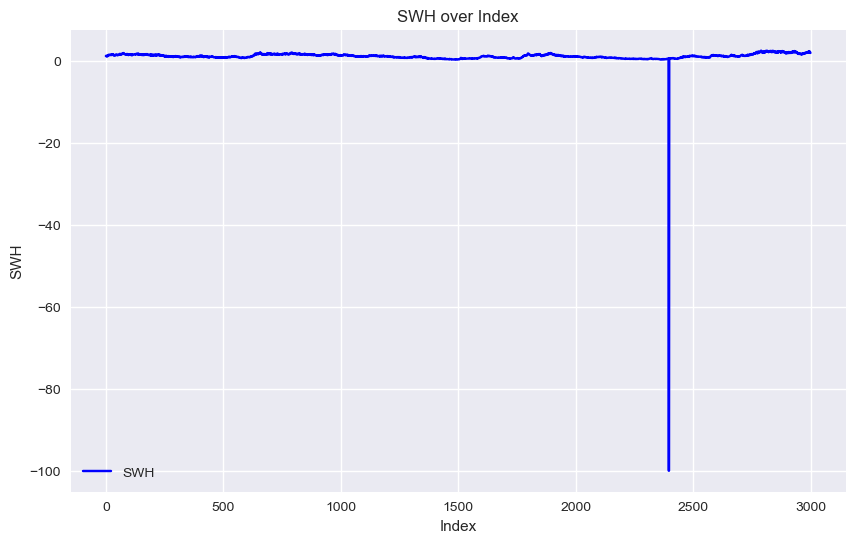

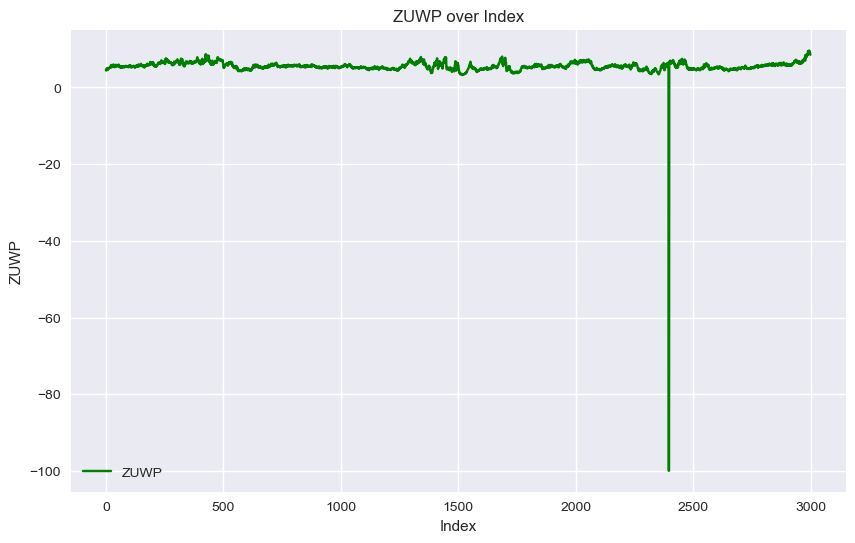

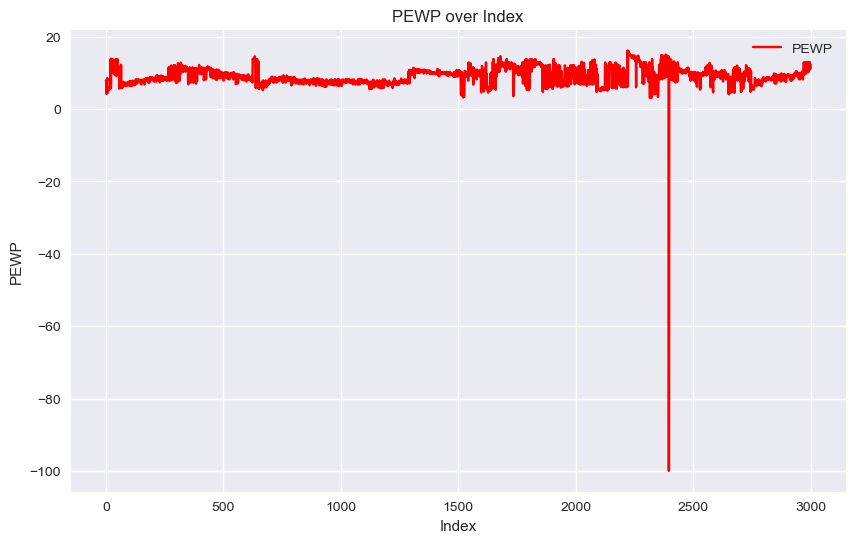

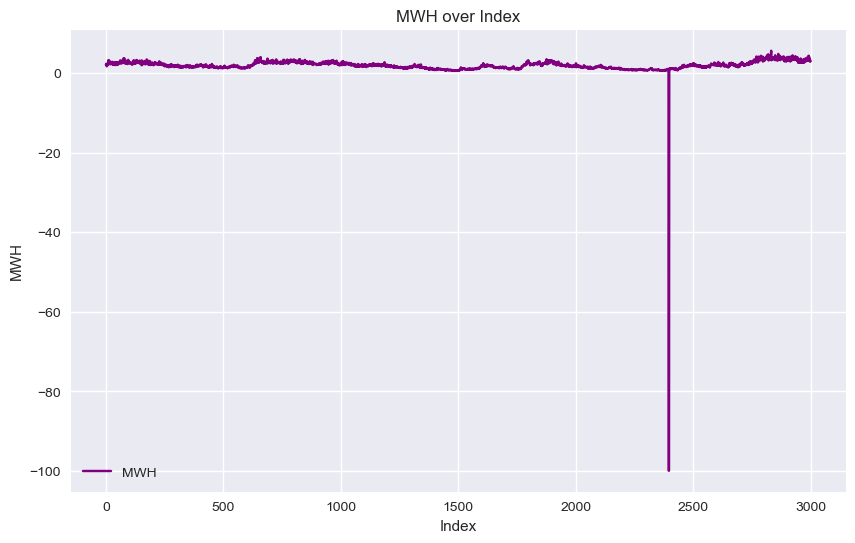

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns(dataset, columns, colors):
    """
    绘制指定列的彩色折线图。

    参数：
    dataset: pd.DataFrame - 包含数据的DataFrame。
    columns: list - 需要绘制的列名列表。
    colors: list - 每个列对应的颜色列表。
    """
    for column, color in zip(columns, colors):
        plt.figure(figsize=(10, 6))
        plt.plot(dataset.index, dataset[column], label=column, color=color)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.title(f'{column} over Index')
        plt.legend()
        plt.show()

# 读取数据
dataset1 = pd.read_csv('E:/Dataset/waves/dataset1.csv')

# 列名列表
columns = ['SWH', 'ZUWP', 'PEWP', 'MWH']

# 颜色列表
colors = ['blue', 'green', 'red', 'purple']

# 调用函数绘制图表
plot_columns(dataset1, columns, colors)


观察到在2500前后有数据异常点，检查后发现  

18/06/2019 09:30	0.606	1.04	6.343	13.588	125	    21.45 
18/06/2019 10:00	-99.9	-99.9	-99.9	-99.9	-99.9	-99.9
18/06/2019 10:30	-99.9	-99.9	-99.9	-99.9	-99.9	-99.9
18/06/2019 11:00	0.576	0.87	6.693	13.726	-99.9	-99.9
18/06/2019 11:30	0.611	1.05	6.386	13.801	-99.9	-99.9
考虑用插值改为换行后的

In [24]:
import pandas as pd
import numpy as np

def handle_exceptions_and_save(input_path, output_path):
    # 读取数据
    df = pd.read_csv(input_path)

    # 检查是否有异常值
    if (df == -99.9).any().any():
        print("发现异常值，正在进行插值处理...")
        
        # 将 -99.9 替换为 NaN
        df.replace(-99.9, np.nan, inplace=True)
        
        # 进行线性插值
        df.interpolate(method='linear', inplace=True)

    else:
        print("未发现异常值，数据无需处理。")

    # 保存为新的CSV文件
    df.to_csv(output_path, index=False)
    print(f"处理后的数据已保存到 {output_path}")

# 使用示例
input_file_path = 'E:/Dataset/waves/dataset1.csv'
output_file_path = 'E:/Dataset/waves/processed_dataset.csv'
# handle_exceptions_and_save(input_file_path, output_file_path)


发现异常值，正在进行插值处理...
处理后的数据已保存到 E:/Dataset/waves/processed_dataset.csv


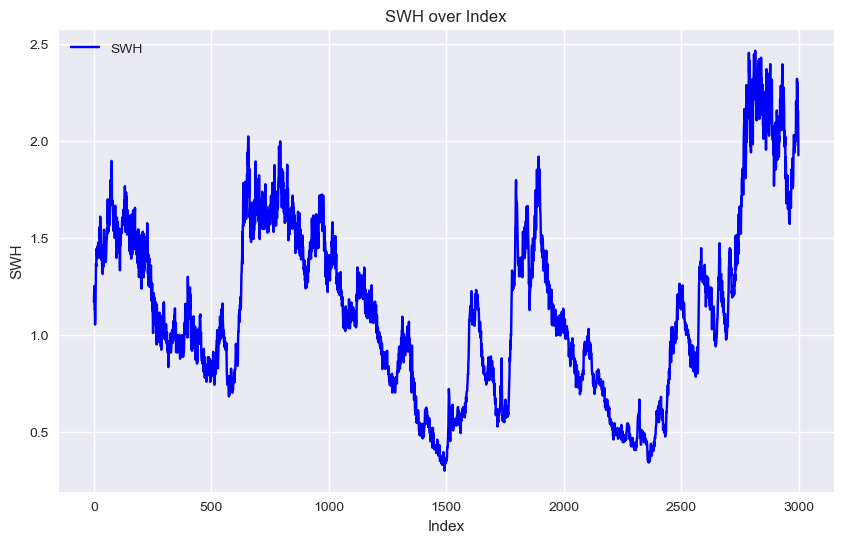

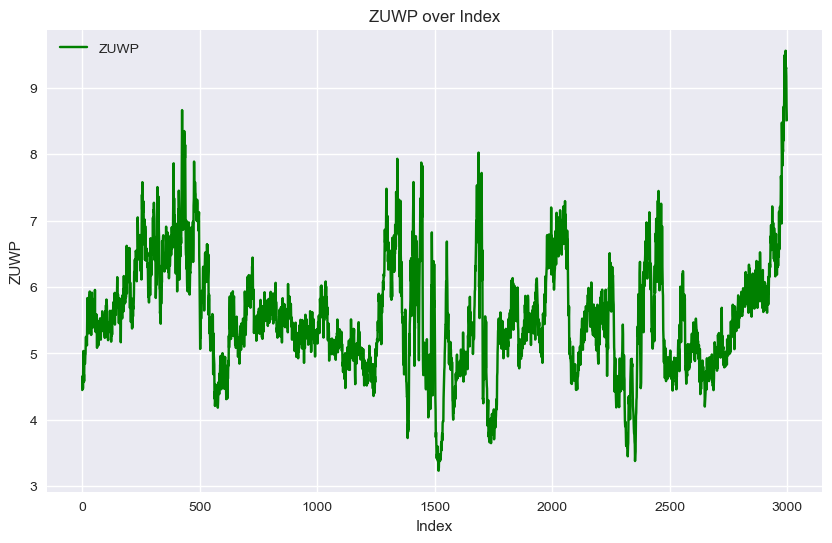

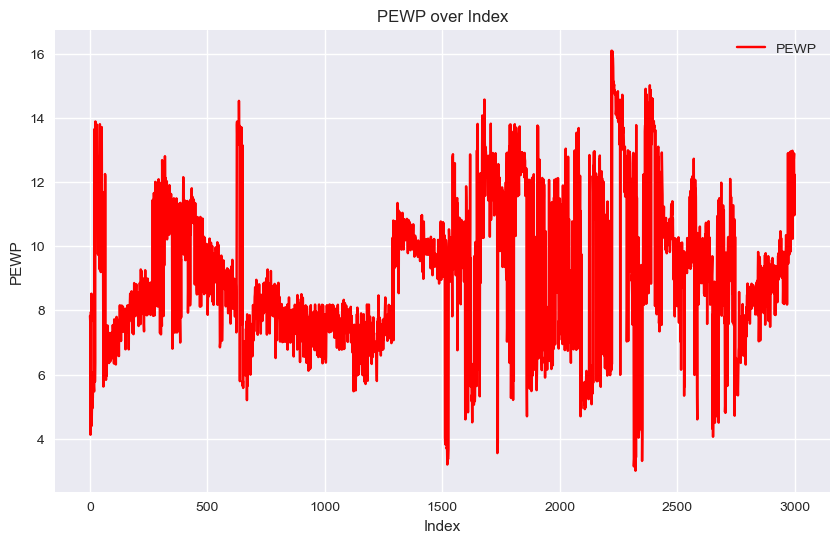

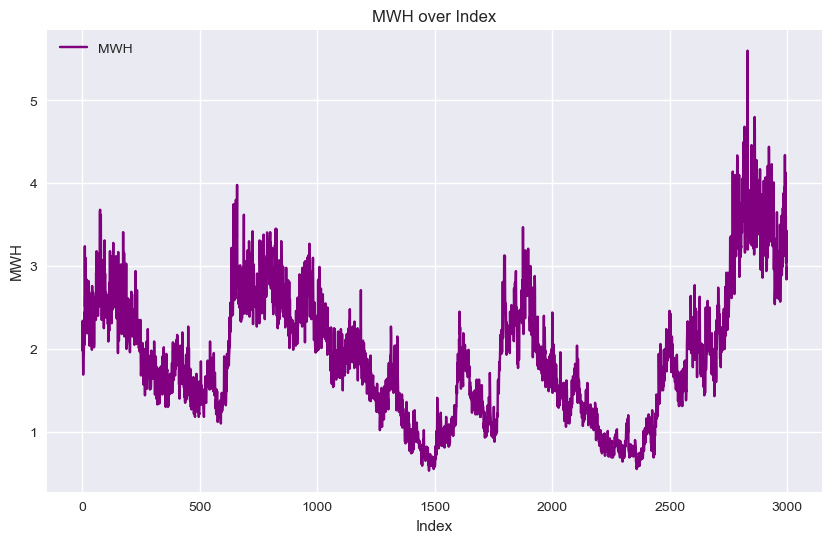

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns(dataset, columns, colors):
    """
    绘制指定列的彩色折线图。

    参数：
    dataset: pd.DataFrame - 包含数据的DataFrame。
    columns: list - 需要绘制的列名列表。
    colors: list - 每个列对应的颜色列表。
    """
    for column, color in zip(columns, colors):
        plt.figure(figsize=(10, 6))
        plt.plot(dataset.index, dataset[column], label=column, color=color)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.title(f'{column} over Index')
        plt.legend()
        plt.show()

# 读取数据
dataset1 = pd.read_csv('E:/Dataset/waves/dataset1.csv')

# 列名列表
columns = ['SWH', 'ZUWP', 'PEWP', 'MWH']

# 颜色列表
colors = ['blue', 'green', 'red', 'purple']

# 调用函数绘制图表
plot_columns(dataset1, columns, colors)


列名: ['#YY', 'MM', 'DD', 'hh', 'mm', 'WH', 'DWP', 'AWP', 'SST']


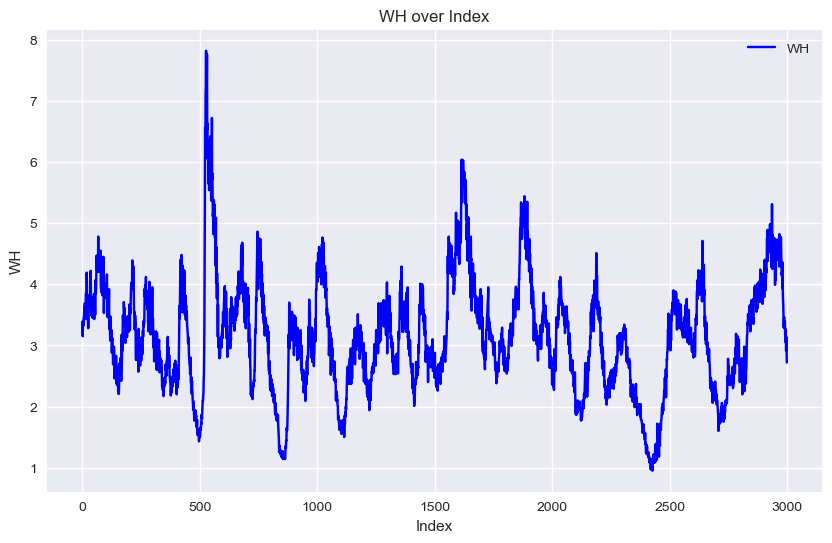

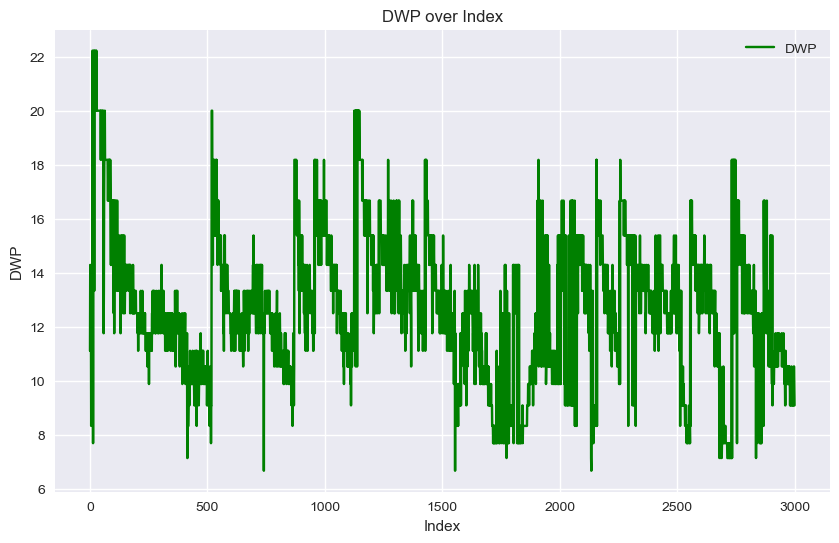

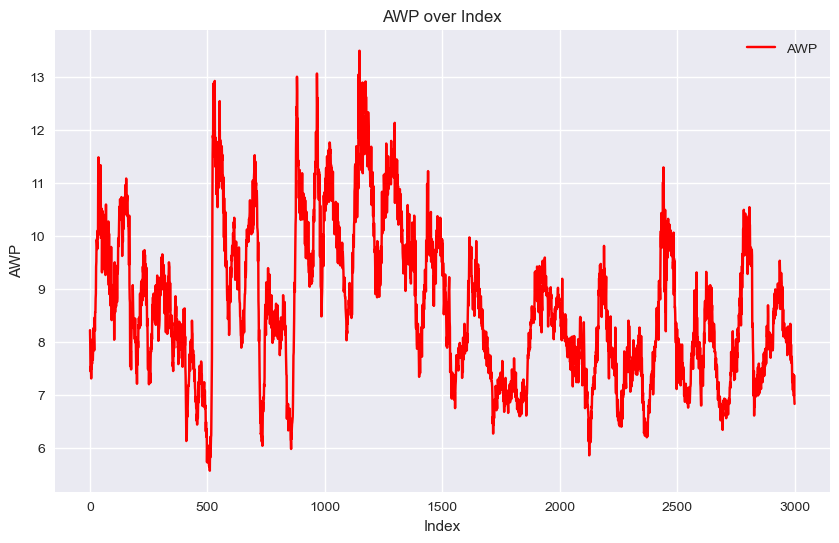

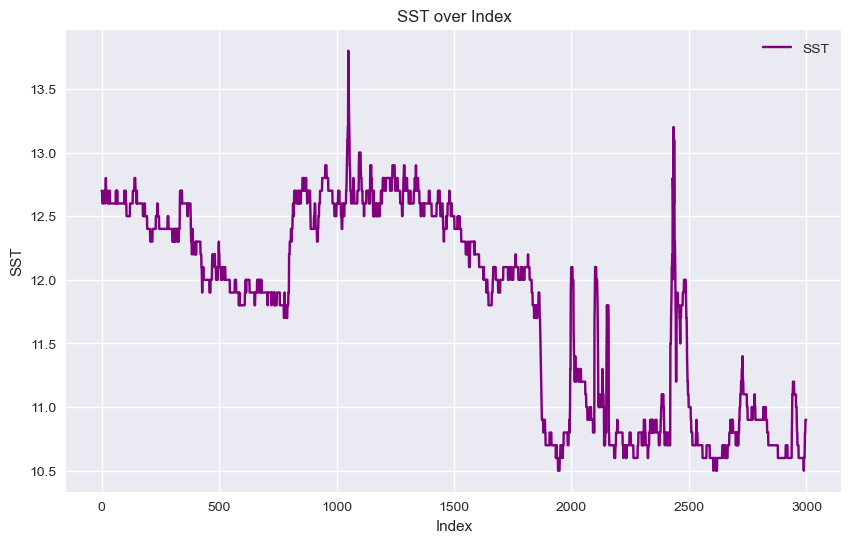

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns(dataset, columns, colors):
    """
    绘制指定列的彩色折线图。

    参数：
    dataset: pd.DataFrame - 包含数据的DataFrame。
    columns: list - 需要绘制的列名列表。
    colors: list - 每个列对应的颜色列表。
    """
    for column, color in zip(columns, colors):
        plt.figure(figsize=(10, 6))
        plt.plot(dataset.index, dataset[column], label=column, color=color)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.title(f'{column} over Index')
        plt.legend()
        plt.show()

# 读取数据，跳过第2行
dataset1 = pd.read_csv('E:/Dataset/waves/dataset2.csv', skiprows=[1])

# 打印列名以检查
print("列名:", dataset1.columns.tolist())

# 列名列表
columns = ['WH', 'DWP', 'AWP', 'SST']

# 确保列的顺序，检查是否存在
missing_columns = [col for col in columns if col not in dataset1.columns]
if missing_columns:
    print(f"缺失列: {missing_columns}")
else:
    dataset1 = dataset1[columns]

    # 颜色列表
    colors = ['blue', 'green', 'red', 'purple']

    # 调用函数绘制图表
    plot_columns(dataset1, columns, colors)
